# E-commerce Sales Analysis & Customer Segmentation
---
## Project Overview and Goal
The goal of this project is to analyze the sales data of an online retail company to identify trends, understand customer behavior, and provide actionable insights to improve sales and marketing strategies. You will act as a data analyst for a fictional e-commerce store called "Trendify."

## Business Context
Trendify is an online retailer that sells a variety of products. The company has been collecting sales data for the past year and wants to leverage this data to make more informed business decisions. They are particularly interested in understanding which products are selling well, who their most valuable customers are, and how they can optimize their marketing efforts.

## Key Question
1. What are the overall sales trends on a monthly and quarterly basis?
2. Which are the top 10 best-selling products by revenue and quantity?
3. Who are the top 10 most valuable customers?
4. What is the geographical distribution of sales?
5. How can we segment our customers based on their purchasing behavior?

## Dataset
"Online Retail" dataset from the UCI Machine Learning Repository

---
#### Import Library

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

#### Read the dataset

In [2]:
sales = pd.read_csv("../data/raw_data/online_retail_II.csv", engine='pyarrow')

# See the top 5 data
sales.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
# See the dataset information
print(sales.info())
print()
print("Missing values on dataset:\n", sales.isna().sum())
print()
print("Duplicate values on dataset:\n", sales.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype        
---  ------       --------------    -----        
 0   Invoice      1067371 non-null  object       
 1   StockCode    1067371 non-null  object       
 2   Description  1062989 non-null  object       
 3   Quantity     1067371 non-null  int64        
 4   InvoiceDate  1067371 non-null  datetime64[s]
 5   Price        1067371 non-null  float64      
 6   Customer ID  824364 non-null   float64      
 7   Country      1067371 non-null  object       
dtypes: datetime64[s](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB
None

Missing values on dataset:
 Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

Duplicate values on dataset:
 34335


The dataset contain 8 column and 1.067.371 rows. <br>
There are 243.007 missing values of Customer ID and 4.382 missing values of product Description. <br>
There are 34.335 duplicate records in the dataset. <br>
The column 'Customer ID' has the wrong data type.

#### Data Cleaning
The dataset contains 243,007 rows with missing Customer ID values. Since the core of this analysis involves customer segmentation (RFM), these records are not usable for our primary goal. We will proceed by dropping these rows. This also resolves the 4,382 missing Description values concurrently.

In [4]:
# Drop missing values
sales = sales.dropna()
sales.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [5]:
# Drop duplicate
sales = sales.drop_duplicates()
sales.duplicated().sum()

np.int64(0)

In [6]:
# Convert columns data types into the right one
sales['Customer ID'] = sales['Customer ID'].astype('str')
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797885 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype        
---  ------       --------------   -----        
 0   Invoice      797885 non-null  object       
 1   StockCode    797885 non-null  object       
 2   Description  797885 non-null  object       
 3   Quantity     797885 non-null  int64        
 4   InvoiceDate  797885 non-null  datetime64[s]
 5   Price        797885 non-null  float64      
 6   Customer ID  797885 non-null  object       
 7   Country      797885 non-null  object       
dtypes: datetime64[s](1), float64(1), int64(1), object(5)
memory usage: 54.8+ MB


In [7]:
# Create new column to count the total price
sales['Total Sales'] = np.round((sales['Price'] * sales['Quantity']), 2)
sales.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [8]:
# Extract Hour from invoice date
sales['Hour'] = sales['InvoiceDate'].dt.hour

# Extract Day from invoice date
sales['Day'] = sales['InvoiceDate'].dt.day

# Extract Month from invoice date
sales['Month'] = sales['InvoiceDate'].dt.month

# Extract year from invoice date
sales['Year'] = sales['InvoiceDate'].dt.year

# Check the dataset
sales.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Sales,Hour,Day,Month,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,7,1,12,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,7,1,12,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,7,1,12,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,7,1,12,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,7,1,12,2009


To ensure the accuracy of sales and monetary calculations, transactions with negative quantities (returns) and zero price have been excluded from the analysis.

In [9]:
# Remove returns (negative Quantity) and items with no price
sales = sales[(sales['Quantity'] > 0) & (sales['Price'] > 0)]

In [10]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 779425 entries, 0 to 1067370
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype        
---  ------       --------------   -----        
 0   Invoice      779425 non-null  object       
 1   StockCode    779425 non-null  object       
 2   Description  779425 non-null  object       
 3   Quantity     779425 non-null  int64        
 4   InvoiceDate  779425 non-null  datetime64[s]
 5   Price        779425 non-null  float64      
 6   Customer ID  779425 non-null  object       
 7   Country      779425 non-null  object       
 8   Total Sales  779425 non-null  float64      
 9   Hour         779425 non-null  int32        
 10  Day          779425 non-null  int32        
 11  Month        779425 non-null  int32        
 12  Year         779425 non-null  int32        
dtypes: datetime64[s](1), float64(2), int32(4), int64(1), object(5)
memory usage: 71.4+ MB


#### Exploratory Data Analysis

In [11]:
# Sales trend
sales_trend = sales.groupby(['Year', 'Month'])['Total Sales'].sum().reset_index()

# Combine Year and Month into a single datetime column
sales_trend['Period'] = pd.to_datetime(sales_trend[['Year', 'Month']].assign(DAY=1))

sales_trend.head()

,Year,Month,Total Sales,Period
0,2009,12,683504.01,2009-12-01
1,2010,1,555802.67,2010-01-01
2,2010,2,504558.95,2010-02-01
3,2010,3,696978.47,2010-03-01
4,2010,4,591982.00,2010-04-01


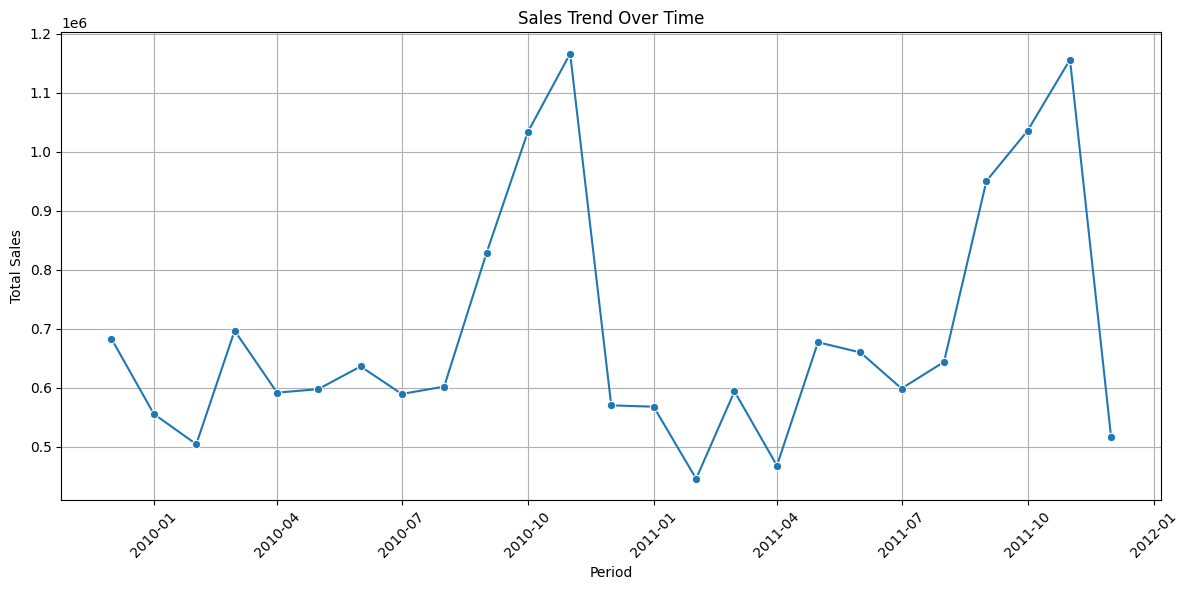

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trend, x='Period', y='Total Sales', marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Period')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Top Products
top_products = sales.groupby(['StockCode', 'Description'])[['Quantity', 'Total Sales']].sum().reset_index()

# Top products by Total Sales
top_product_sales = top_products.sort_values(by='Total Sales', ascending=False)
# Get top 10
top_10_sales = top_product_sales.head(10)

# Top products by Quantity sold
top_product_qty = top_products.sort_values(by='Quantity', ascending=False)
# Get top 10
top_10_qty = top_product_qty.head(10)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8412\3690475079.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10_sales, y='Description', x='Total Sales', palette='Blues_d')


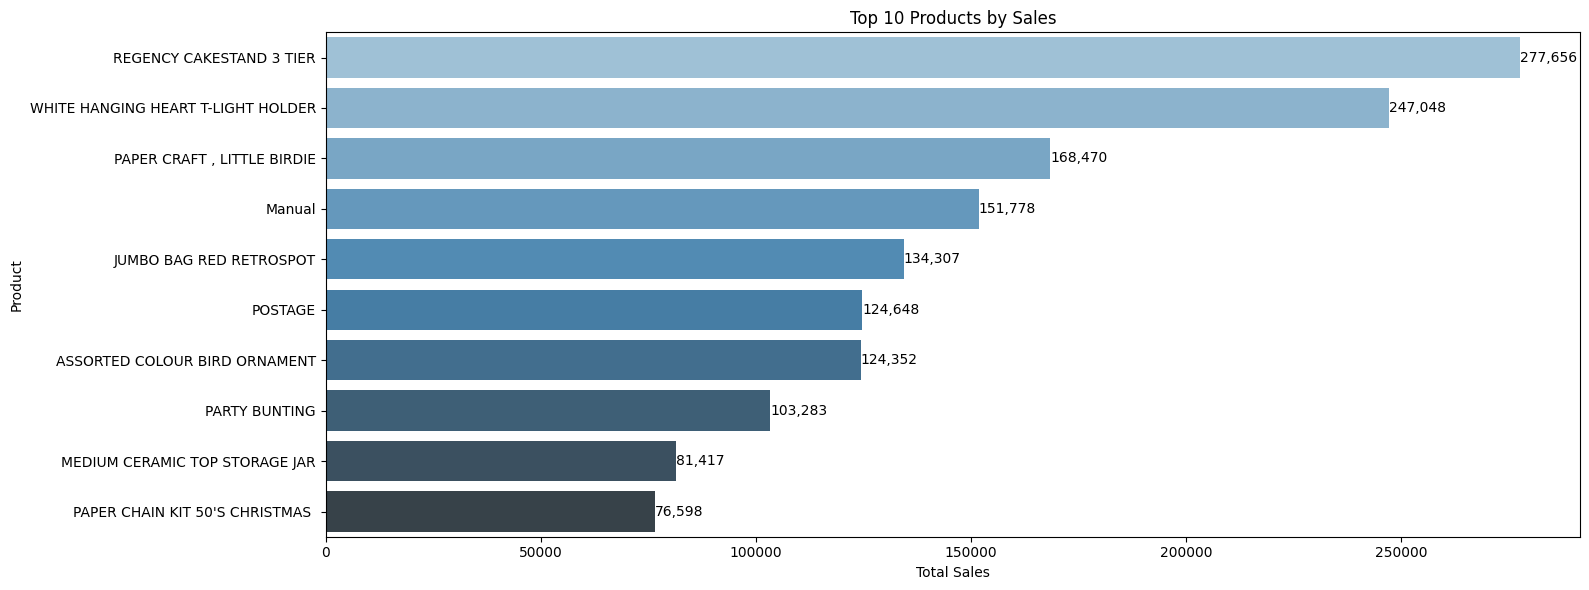

In [14]:
# Top 10 Products by Sales
plt.figure(figsize=(16, 6))
ax = sns.barplot(data=top_10_sales, y='Description', x='Total Sales', palette='Blues_d')

# Add data labels
for i, value in enumerate(top_10_sales['Total Sales']):
    plt.text(value, i, f'{value:,.0f}', va='center')  # format with comma, no decimal

plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


"REGENCY CAKESTAND 3 TIER” is the standout best-seller, generating 12% more than the sales of the #2 product (“White Hanging Heart T-Light Holder”), marking it as a cornerstone item that should anchor marketing and merchandising efforts. 

The top 10 is dominated by decorative, craft, and seasonal home goods—like bird ornaments, paper crafts, and Christmas kits—indicating strong customer demand for aesthetic, DIY, and gifting products.

Notably, “Manual” ranks #4, suggesting customers value instructional content, while “POSTAGE” appearing in the top 10 likely reflects shipping fees (not a true product) and should be excluded from product performance analysis.

Sales drop sharply after the top 3, revealing a long-tail pattern: prioritize the top performers for revenue growth, and use lower-ranked items for seasonal promotions or bundling.

C:\Users\Admin\AppData\Local\Temp\ipykernel_8412\1578255447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10_qty, y='Description', x='Quantity', palette='Blues_d')


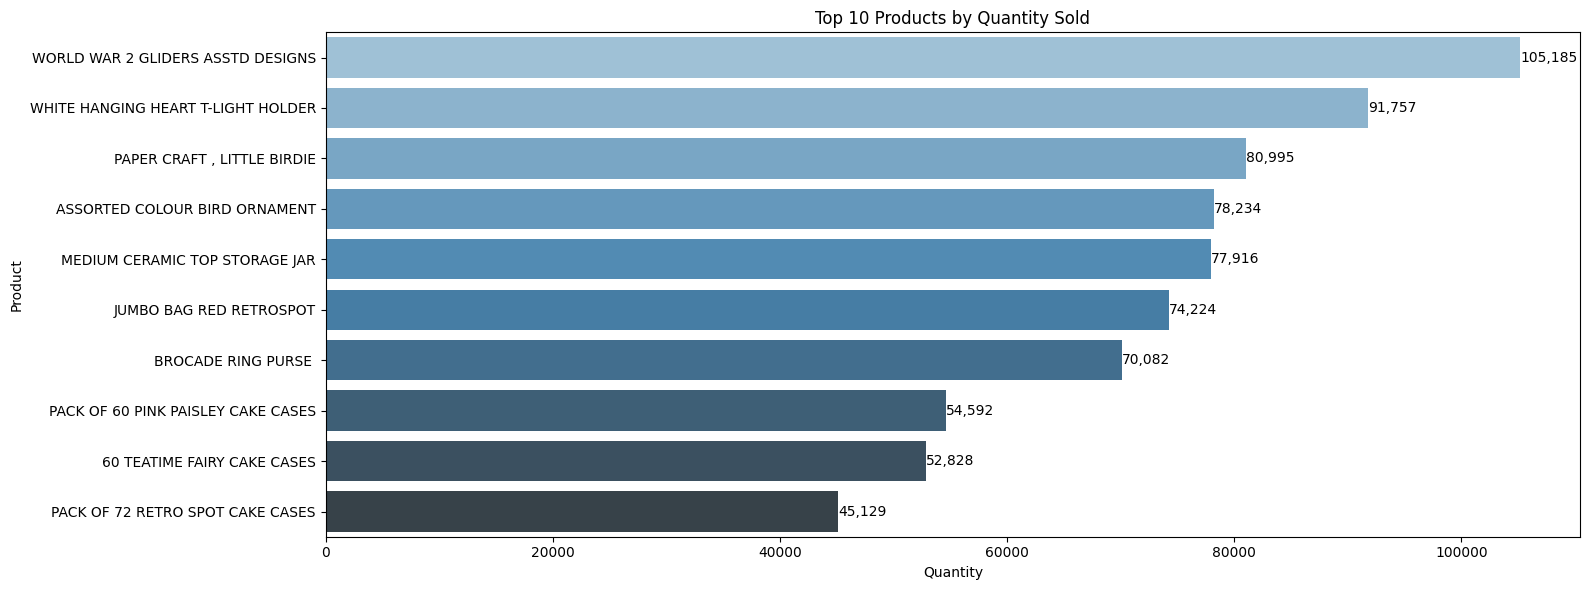

In [15]:
# Top 10 Products by Sales
plt.figure(figsize=(16, 6))
ax = sns.barplot(data=top_10_qty, y='Description', x='Quantity', palette='Blues_d')

# Add data labels
for i, value in enumerate(top_10_qty['Quantity']):
    plt.text(value, i, f'{value:,.0f}', va='center')  # format with comma, no decimal

plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Quantity")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

Your top sellers aren’t necessarily the most expensive — they’re the most frequently bought. Optimize for inventory turnover, packaging efficiency, and cross-selling — especially for cake cases and craft kits that appeal to bulk buyers.

In [ ]:
# Most valuable customers
valuable_cust = sales.groupby(['Customer ID'])['Total Sales'].sum().reset_index()
valuable_cust = valuable_cust.sort_values(by='Total Sales', ascending=False)
top10_val_cust = valuable_cust.head(10)

,Customer ID,Total Sales
5692,18102.0,580987.04
2277,14646.0,528602.52
1789,14156.0,313437.62
2538,14911.0,291420.81
5050,17450.0,244784.25
1331,13694.0,195640.69
5109,17511.0,172132.87
4061,16446.0,168472.50
4295,16684.0,147142.77
68,12415.0,144458.37


C:\Users\Admin\AppData\Local\Temp\ipykernel_8412\1116417620.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10_val_cust, y='Customer ID', x='Total Sales', palette='viridis')


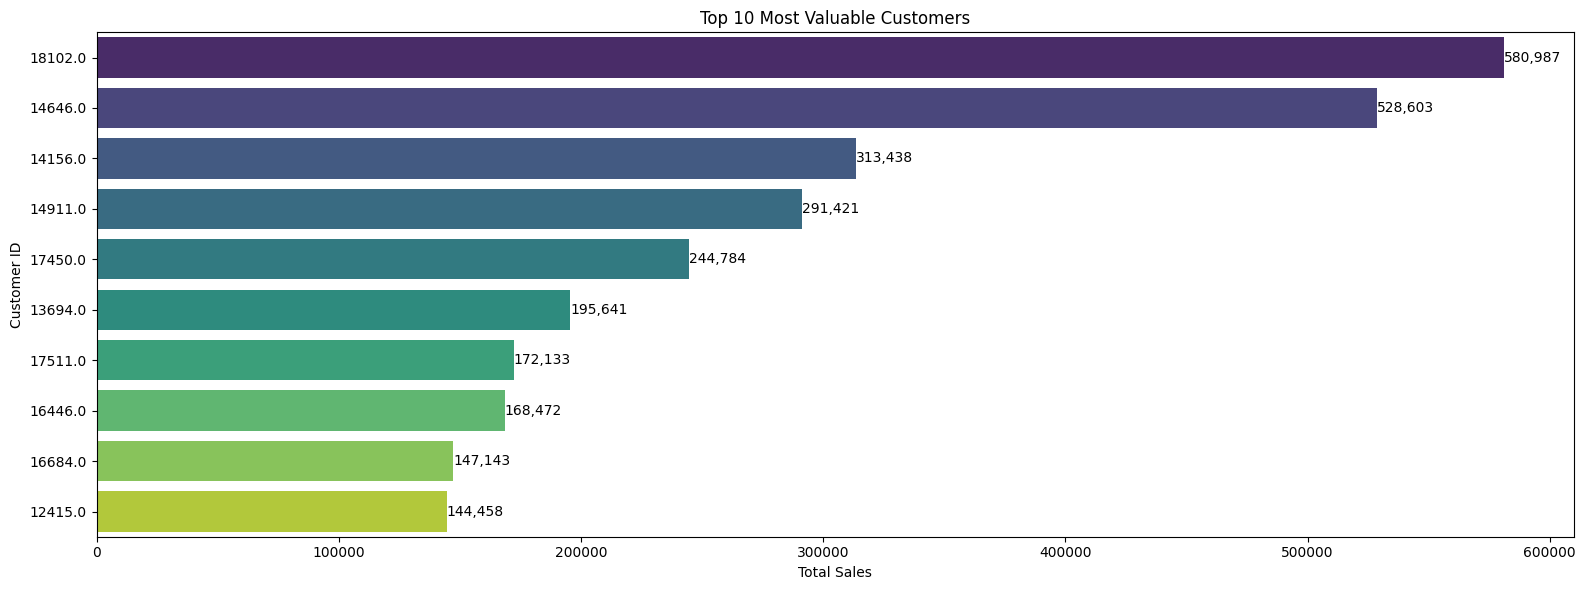

In [17]:
# Top Customer
plt.figure(figsize=(16, 6))
ax = sns.barplot(data=top10_val_cust, y='Customer ID', x='Total Sales', palette='viridis')

# Add data labels
for i, value in enumerate(top10_val_cust['Total Sales']):
    plt.text(value, i, f'{value:,.0f}', va='center')  # format with comma, no decimal

plt.title("Top 10 Most Valuable Customers")
plt.xlabel("Total Sales")
plt.ylabel("Customer ID")
plt.tight_layout()
plt.show()

Customer ID 18102.0 is the #1 most valuable customer (580,987 in total sales) — generating ~10% more than #2 (ID 14646.0, 528,603) and nearly 4x more than the #10 customer (ID 12415.0, 144,458).<b> This signals a highly skewed customer value distribution: a small group drives disproportionate revenue. </b>

These top 10 customers alone represent ~2.5M+ in combined sales — likely repeat buyers or bulk purchasers. They should be prioritized for loyalty programs, personalized offers, and dedicated account management to retain and grow their lifetime value.

Notably, sales drop sharply after the top 3:
→ #3 (ID 14156.0) generates 313,438 — ~40% less than #1.
→ The bottom half of the top 10 sells under 175K each — still high-value, but far from the elite tier.

This “power user” pattern suggests targeted retention strategies will yield outsized returns: consider VIP tiers, early access, or exclusive bundles for the top 3–5 customers.

<b>Strategic Takeaway:</b> <br>
<b> Your most valuable customers aren’t just big spenders — they’re loyal anchors.</b> Invest in understanding their behavior, preferences, and purchase cycles. Even small increases in their spending or frequency can significantly boost overall revenue. 

In [18]:
# Top Country Contributed to sales
top_country = sales.groupby(['Country'])['Total Sales'].sum().reset_index()
top_country = top_country.sort_values(by='Total Sales', ascending=False)
top_10_country = top_country.head(10)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8412\3177377039.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10_country, y='Country', x='Total Sales', palette='viridis')


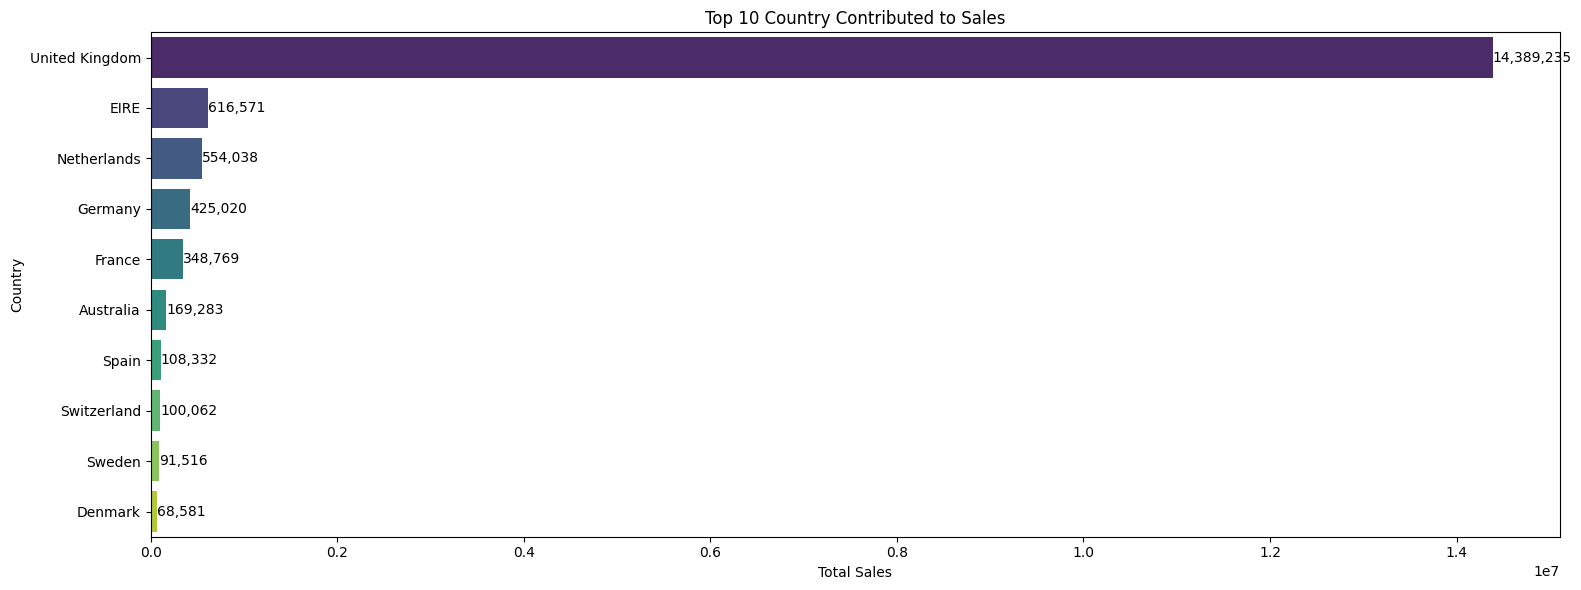

In [19]:
# Top Country Contributed to sales
plt.figure(figsize=(16, 6))
ax = sns.barplot(data=top_10_country, y='Country', x='Total Sales', palette='viridis')

# Add data labels
for i, value in enumerate(top_10_country['Total Sales']):
    plt.text(value, i, f'{value:,.0f}', va='center')  # format with comma, no decimal

plt.title("Top 10 Country Contributed to Sales")
plt.xlabel("Total Sales")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

The United Kingdom dominates sales (14,389,235) — contributing more than 2x the sales of #2 (EIRE, 616,571) and over 20x more than #10 (Denmark, 68,581). This confirms the UK is not just the largest market — it’s the core engine of your e-commerce revenue.

The top 3 — UK, EIRE, Netherlands — together account for ~20.5M in sales, suggesting a strong Western European focus. These markets should be prioritized for localized marketing, logistics optimization, and customer service investment.

Sales drop sharply after the top 3:
→ Germany (#4, 425,020) sells ~77% less than EIRE.
→ The bottom half of the top 10 (Spain to Denmark) each contribute under 110K — still meaningful, but dwarfed by the UK.

This “long-tail geographic distribution” means growth opportunities lie in scaling beyond the UK — consider targeted campaigns in high-potential markets like Germany or France, where demand exists but hasn’t yet scaled.

<b>Strategic Takeaway:</b><br>
Don’t mistake dominance for saturation — the UK’s massive share may hide untapped potential elsewhere. Use its success as a blueprint to replicate in other European markets. Meanwhile, protect and nurture the UK with loyalty programs, faster shipping, and localized content.

#### Customer Recency, Frequency, Monetary value, and segmentation

In [20]:
# Snapshot date = date of last purchase in dataset + 1 day
snapshot_date = sales['InvoiceDate'].max() + pd.Timedelta(days=1)

# RFM Metrics
rfm = sales.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'Invoice': 'nunique',                                   # Frequency
    'Total Sales': 'sum'                                      # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

# RFM scoring (higher is better, so lower recency gets higher score)
rfm['R'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Show the data
rfm.head()

,Customer ID,Recency,Frequency,Monetary,R,F,M
0,12346.0,326,12,77556.46,2,5,5
1,12347.0,2,8,4921.53,5,4,5
2,12348.0,75,5,2019.40,3,4,4
3,12349.0,19,4,4428.69,5,3,5
4,12350.0,310,1,334.40,2,1,2


#### Customer Clustering using K-Means

In [21]:
# Import library for clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import plotly.express as px

In [22]:
# Select RFM features
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]

# Normalize the values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

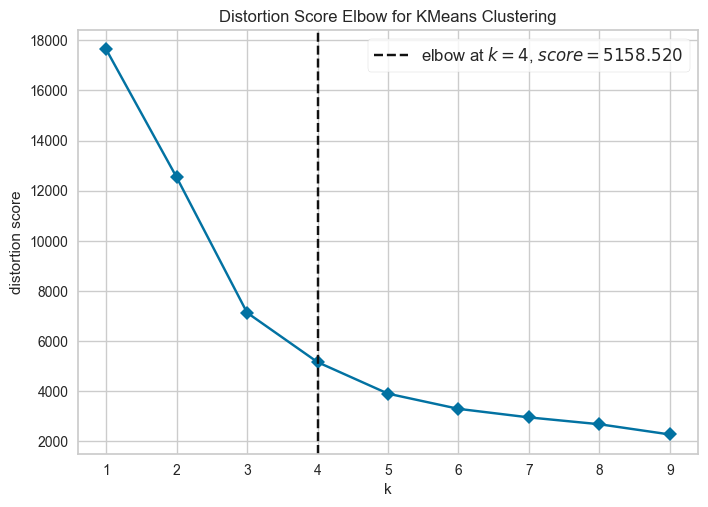

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
sse = []  # Sum of Squared Errors

# Use KElbowVisualizer with KMeans
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1, 10), metric='distortion', timings=False)

# Fit the visualizer with the scaled RFM data
visualizer.fit(rfm_scaled)
visualizer.show()

In [24]:
# Fit KMeans with chosen k (k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

In [25]:
# Group RFM by cluster
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'Customer ID': 'count'
}).rename(columns={'Customer ID': 'Count'}).reset_index()

print(cluster_summary)


   Cluster     Recency   Frequency       Monetary  Count
0        0  462.517224    2.213679     749.231877   2003
1        1   66.758342    7.313608    2948.950229   3836
2        2   25.942857  103.714286   81356.335143     35
3        3    3.500000  212.500000  428611.997500      4


In [26]:
# Visualize Clustering on 3D Scatter plot
fig = px.scatter_3d(
    rfm,
    x='Recency',
    y='Frequency',
    z='Monetary',
    color='Cluster',
    title='3D RFM Cluster Visualization (Interactive)',
    size_max=18,
    opacity=0.7
)
fig.show()

#### RFM Cluster Interpretation

This analysis segments customers into four distinct groups based on their purchasing behavior (Recency, Frequency, Monetary value).

---

#### Cluster 3: Top Champions / Whales 🐋

* **Recency:** `3.5` (Extremely low)
* **Frequency:** `212.5` (Extremely high)
* **Monetary:** `428,611.9` (Extremely high)
* **Count:** `4` (A tiny, elite group)

**Who they are:** These are your absolute **best customers**. They have purchased very recently, buy merchandise extremely often, and spend a massive amount of money—far more than any other group.

**Recommended Strategy:**
* **White-Glove Treatment:** Provide personalized, high-touch service.
* **Exclusive Access:** Offer early access to new products and exclusive rewards.
* **Seek Feedback:** Their opinion is highly valuable; ask for their input on products and services.

---

#### Cluster 2: Champions / Loyalists 🏆

* **Recency:** `25.9` (Very low)
* **Frequency:** `103.7` (Very high)
* **Monetary:** `81,356.3` (Very high)
* **Count:** `35` (A small, valuable group)

**Who they are:** This group forms a core group of **loyal, high-value customers**. They are highly engaged, purchase often, spend a lot, and have bought from you recently.

**Recommended Strategy:**
* **Reward Loyalty:** Implement loyalty programs to reward their continued business.
* **Upsell New Products:** They are the most likely to be interested in new or premium products.
* **Encourage Advocacy:** Motivate them to become brand advocates through referral programs.

---

#### Cluster 1: Core / Potential Loyalists 🌱

* **Recency:** `66.7` (Moderate)
* **Frequency:** `7.3` (Moderate)
* **Monetary:** `2,948.9` (Moderate)
* **Count:** `3,836` (Your largest group)

**Who they are:** This is the backbone of your customer base. They are "average" customers who hold the **greatest potential for growth**.

**Recommended Strategy:**
* **Nurture and Engage:** Use targeted email marketing with personalized recommendations.
* **Build a Relationship:** Encourage engagement on social media to build a stronger brand connection.
* **Upsell/Cross-sell:** Offer them products related to their past purchases to increase order value.

---

##### Cluster 0: At-Risk / Lost Customers 😟

* **Recency:** `462.5` (Extremely high)
* **Frequency:** `2.2` (Very low)
* **Monetary:** `749.2` (Low)
* **Count:** `2,003` (A large, inactive group)

**Who they are:** These customers have not purchased in a **very long time**. They are either churned or at high risk of churning.

**Recommended Strategy:**
* **Reactivation Campaign:** Target them with a special "We Miss You!" offer to entice them back.
* **Survey for Feedback:** Try to understand why they stopped buying.
* **Low Priority:** Avoid spending significant marketing resources here if reactivation campaigns fail.

---

#### Summary Table

| Cluster | Persona | Key Characteristics | Recommended Action |
| :--- | :--- | :--- | :--- |
| **3** | **Top Champions** | Bought yesterday, buys constantly, spends the most. | Personalize, reward, get feedback. |
| **2** | **Champions** | Bought recently, buys often, spends a lot. | Upsell, create loyalty programs. |
| **1** | **Core Customers** | Average R, F, and M. The largest group. | Nurture, engage, and grow. |
| **0** | **Lost Customers** | Hasn't bought in a long time; low value. | Launch a win-back campaign or ignore. |

---

#### Actionable Insights
1. Re-engage At-Risk Customers <br>
Analysis revealed a large"At-Risk" customersegment. Action: Launch atargeted email campaignwith a special discount towin back these customersand prevent churn.

2. Retain High-Value Customers<br>
An elite group of "VIP" &"Champion" customers(<1%) generates a massiveshare of revenue. Action:Implement an exclusiveloyalty program withspecial perks to ensureretention of these criticalcustomers.

3. Optimize Product Strategy<br>
Analysis identified distinctproduct groups (high-value vs. high-volume).Action: Promote high-valueitems to VIPs and usepopular, low-cost items as"add-ons" to increaseaverage order value.

4. Drive Strategic Expansion<br>
Geographical analysisshows Australia is the top-performing non-Europeanmarket. Action: Launchtargeted digital advertisingfor Australia to accelerategrowth and capitalize onthis proven product-market fit.

In [27]:
# # Export dataset for data visualization in Power BI
# sales.to_csv("../data/preprocessed_data/Cleaned Sales Data.csv", index=False)
# rfm.to_csv("../data/preprocessed_data/RFM Analysis.csv", index=False)